<a href="https://colab.research.google.com/github/matthewbhlau/crispr-kit/blob/main/single_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from google.colab import files
import os


In [ ]:
def upload_file(prompt):
    print(prompt)
    uploaded = files.upload()
    # The keys of 'uploaded' are the filenames of the uploaded files.
    # We assume here that exactly one file was uploaded.
    return next(iter(uploaded))

In [ ]:
'''
This function takes in the 6 cropped images/conditions and calculates the mean
RGB values of the images. Returns a list with total rgb values (18 total)

[NC, PC, NT, RT, YT, BT]
'''
def rgb_analysis(*image_paths):
    total_rgb = []
    for i, image_path in enumerate(image_paths):
        ind_rgb = []
        # Load the image
        img = cv2.imread(image_path)
        # Split the image into its Red, Green, and Blue channels
        b, g, r = cv2.split(img)
        # Calculate the mean RGB values for each channel and add to list
        r_mean = np.mean(r)
        ind_rgb.append(r_mean)
        g_mean = np.mean(g)
        ind_rgb.append(g_mean)
        b_mean = np.mean(b)
        ind_rgb.append(b_mean)
        total_rgb.append(ind_rgb)
        print(f"Image {i + 1} RGB values: R={r_mean}, G={g_mean}, B={b_mean}")
    return total_rgb

In [ ]:
'''
This function takes in the raw rgb values and computes the relative expression levels.
Output is a list with the 6 relative expression values
'''
def relative_expression(conditions):
    r_nc = conditions[0][0]
    g_nc = conditions[0][1]
    y_nc = conditions[0][2]
    for condition in conditions:
        condition[0] -= r_nc
        condition[1] -= g_nc
        condition[2] -= y_nc
    # dimensional reduction
    reductions = []
    r_pc = conditions[1][0]
    g_pc = conditions[1][1]
    y_pc = conditions[1][2]
    denom = math.sqrt(r_pc ** 2 + g_pc ** 2 + y_pc ** 2)
    for new in conditions:
        reductions.append((new[0] * r_pc + new[1] * g_pc + new[2] * y_pc) / denom)
    express_vals = []
    pc_val = reductions[1]
    for reduction in reductions:
        express_vals.append(reduction / pc_val)

    return express_vals

In [ ]:
def expression_plot(express_vals, filename):
    # positions for the bars
    bar_width = 0.35
    index = range(len(express_vals))

    # creating the bars
    fig, ax = plt.subplots()
    bar1 = ax.bar(index, express_vals, bar_width, label="Expression", color='yellow')

    # adding the blue line at y=0
    ax.axhline(0, color='blue')

    # adding labels and title
    ax.set_xlabel('Conditions')
    ax.set_ylabel('Relative Expression values')
    ax.set_title('Relative Expression')
    ax.set_xticks(index)  # Set the tick positions to match the number of labels
    ax.set_xticklabels(('NC', 'PC', 'NT', 'RT', 'YT', 'BT'))  # Set the tick labels

    # Save the plot as a JPG file
    plt.savefig(filename, dpi=300)

    # Display the plot
    plt.show()


Saving Screenshot 2023-09-05 at 9.48.49 AM.tif to Screenshot 2023-09-05 at 9.48.49 AM.tif
Saving Screenshot 2023-09-05 at 9.48.55 AM.tif to Screenshot 2023-09-05 at 9.48.55 AM.tif
Saving Screenshot 2023-09-05 at 9.49.00 AM.tif to Screenshot 2023-09-05 at 9.49.00 AM.tif
Saving Screenshot 2023-09-05 at 9.49.06 AM.tif to Screenshot 2023-09-05 at 9.49.06 AM.tif
Saving Screenshot 2023-09-05 at 9.49.14 AM.tif to Screenshot 2023-09-05 at 9.49.14 AM.tif
Saving Screenshot 2023-09-05 at 9.49.20 AM.tif to Screenshot 2023-09-05 at 9.49.20 AM.tif
Image 1 RGB values: R=162.41405577088716, G=160.6314599483204, B=149.697655192568
Image 2 RGB values: R=172.6762016909979, G=156.8814582662883, B=87.06966955326058
Image 3 RGB values: R=169.45902111454438, G=155.4095618528758, B=94.22198392692579
Image 4 RGB values: R=165.20444061147185, G=151.35677421536798, B=88.14093614718615
Image 5 RGB values: R=163.0407052588667, G=157.63843456991438, B=134.23120260905014
Image 6 RGB values: R=152.34324415705169, G=1

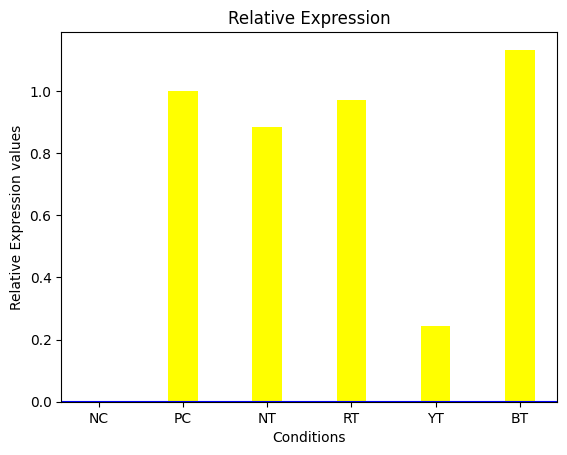

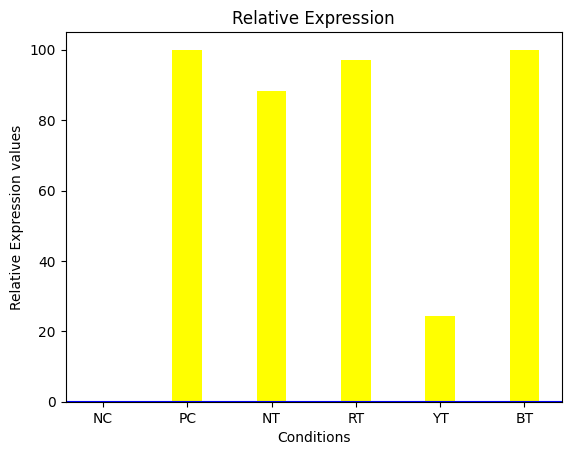

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import csv
def main():
    # Ask the user to upload the 6 images.
    prompt = "Upload the 6 cropped images/conditions in order (NC, PC, NT, RT, YT, BT)"
    uploaded_files = files.upload()

    # Sort uploaded files based on creation time
    sorted_files = sorted(uploaded_files.keys(), key=lambda file: os.path.getctime(file))

    # Ensure there are exactly 6 files uploaded
    if len(sorted_files) != 6:
        print("Please upload exactly 6 images.")
        return

    # Compute the original RGB values and expression values
    total_rgb = rgb_analysis(*sorted_files)
    express_vals = relative_expression(total_rgb)

    # Create a new set of data by multiplying values by 100
    final_a_new = [val * 100 for val in express_vals]

    # Apply conditions - make 100 if greater than 100; make 0 if less than 0
    final_a_new = [min(max(val, 0), 100) for val in final_a_new]

    # Plot the expression values and save the graphs
    expression_plot(express_vals, filename='expression_plot.jpg')
    expression_plot(final_a_new, filename='expression_plot_modified.jpg')

    # Save original and modified expression values to CSV files
    with open('calculated_values.csv', 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Condition', 'Expression Value'])  # Write header
        conditions = ['NC', 'PC', 'NT', 'RT', 'YT', 'BT']
        for i in range(len(conditions)):
            csv_writer.writerow([conditions[i], express_vals[i]])

    with open('calculated_values_modified.csv', 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Condition', 'Expression Value'])  # Write header
        for i in range(len(conditions)):
            csv_writer.writerow([conditions[i], final_a_new[i]])

    # Download both CSV files and JPG files to your local machine's Downloads folder
    files.download('calculated_values.csv')
    files.download('calculated_values_modified.csv')
    files.download('expression_plot.jpg')
    files.download('expression_plot_modified.jpg')



if __name__ == "__main__":
    main()
